## Sample Testing on how to apply given filters on 1 file

In [2]:
# To ignore wornings in code
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
data = pd.read_csv('E:/21-05-2021/BSEG_2019_4.txt' , sep = '^')

In [4]:
data.head()

,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20190430,400,BWPL,1400000683,2019,0,0,,40,S,...,0.0,BKPF,1400000683BWPL2019,0,0,0,*,,*,NaN
1,20190430,400,BWPL,1400000717,2019,0,0,,40,S,...,0.0,BKPF,1400000717BWPL2019,0,0,0,*,,*,NaN
2,20190430,400,BWPL,1400000719,2019,0,0,,40,S,...,0.0,BKPF,1400000719BWPL2019,0,0,0,*,,*,NaN
3,20190430,400,BWPL,1400000723,2019,0,0,,40,S,...,0.0,BKPF,1400000723BWPL2019,0,0,0,*,,*,NaN
4,20190430,400,BWPL,1400000724,2019,0,0,,40,S,...,0.0,BKPF,1400000724BWPL2019,0,0,0,*,,*,NaN


In [5]:
# Take only those columns which has required data in it
data = data[['H_BUDAT' , 'SHKZG' , 'DMBTR' , 'HKONT']]

In [6]:
print(len(data))

354778


In [7]:
data.head()

,H_BUDAT,SHKZG,DMBTR,HKONT
0,20190430,S,549396.0,20801010
1,20190430,S,1935043.0,20801010
2,20190430,S,229713.0,20801010
3,20190430,S,333968.0,20801010
4,20190430,S,328153.0,20801010


In [8]:
# Consider those entries which have HKNOT value as 40801000
data = data.loc[data['HKONT'] == 40801000]
print(len(data))
data.head()

263


,H_BUDAT,SHKZG,DMBTR,HKONT
5394,20190405,S,3200.0,40801000
5396,20190420,S,3200.0,40801000
5398,20190421,S,3200.0,40801000
5402,20190426,S,3200.0,40801000
5404,20190430,S,3200.0,40801000


In [9]:
# As value on S is debit and h is credit
# For positive outcome take debit as positive and credit as negative
dummy = data.loc[data['SHKZG'] == 'S']
dummy2 = data.loc[data['SHKZG'] != 'S']
dummy2['DMBTR'] = -1 * dummy2['DMBTR']
print(dummy.head())
print(dummy2.head())
data = pd.concat([dummy , dummy2])
print(len(data) , len(dummy) , len(dummy2))
data.head()

       H_BUDAT SHKZG   DMBTR     HKONT
5394  20190405     S  3200.0  40801000
5396  20190420     S  3200.0  40801000
5398  20190421     S  3200.0  40801000
5402  20190426     S  3200.0  40801000
5404  20190430     S  3200.0  40801000
         H_BUDAT SHKZG       DMBTR     HKONT
334464  20190418     H -1410325.22  40801000
263 262 1


,H_BUDAT,SHKZG,DMBTR,HKONT
5394,20190405,S,3200.0,40801000
5396,20190420,S,3200.0,40801000
5398,20190421,S,3200.0,40801000
5402,20190426,S,3200.0,40801000
5404,20190430,S,3200.0,40801000


In [10]:
# Covert date in proper format
data['H_BUDAT'] = pd.to_datetime(data['H_BUDAT'], format='%Y%m%d')
# Remove time from dates
data['Date'] = data['H_BUDAT'].apply(lambda x: str(x)[:-9])
# Group entries daywise
data = data.groupby(['Date'])['DMBTR'].sum().reset_index()
print(len(data))
data.head()

30


,Date,DMBTR
0,2019-04-01,18862.76
1,2019-04-02,90620.69
2,2019-04-03,132307.35
3,2019-04-04,49000.00
4,2019-04-05,80653.49


In [11]:
data.head(30)

,Date,DMBTR
0,2019-04-01,18862.76
1,2019-04-02,90620.69
2,2019-04-03,132307.35
3,2019-04-04,49000.00
4,2019-04-05,80653.49
5,2019-04-06,57738.25
6,2019-04-07,165696.04
7,2019-04-08,303656.07
8,2019-04-09,93463.35
9,2019-04-10,69425.00


## How to read all files in 1 directory

In [12]:
# This is the tecnique to read all the files in specified directory
import os
import glob

path = 'E:/21-05-2021/'
csv_files = glob.glob(os.path.join(path, "*.txt"))

for f in csv_files:
      
    # read the csv file
    print(f)
    df = pd.read_csv(f , sep = '^')
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
    
    print('Content:')
    display(df)
    print()

E:/21-05-2021\BSEG_2019_10.txt
Location: E:/21-05-2021\BSEG_2019_10.txt
File Name: BSEG_2019_10.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20191003,400,BWPL,1400004640,2019,0,0,,40,S,...,0.0,BKPF,1400004640BWPL2019,0,0,0,*,,*,NaN
1,20191003,400,BWPL,1400004642,2019,0,0,,40,S,...,0.0,BKPF,1400004642BWPL2019,0,0,0,*,,*,NaN
2,20191003,400,BWPL,1400004644,2019,0,0,,40,S,...,0.0,BKPF,1400004644BWPL2019,0,0,0,*,,*,NaN
3,20191003,400,BWPL,1400004646,2019,0,0,,40,S,...,0.0,BKPF,1400004646BWPL2019,0,0,0,*,,*,NaN
4,20191003,400,BWPL,1400004648,2019,0,0,,40,S,...,0.0,BKPF,1400004648BWPL2019,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367842,20191031,400,BWPL,5200015353,2019,0,0,,50,S,...,0.0,VBRK,200065,0,0,0,0010002943,D,0020601000,NaN
367843,20191031,400,BWPL,5200015355,2019,20191104,20191105,0100048459,1,D,...,0.0,VBRK,200066,20191031,20191031,20191031,0040201010,S,0040201010,10002766.0
367844,20191031,400,BWPL,5200015355,2019,0,0,,50,S,...,0.0,VBRK,200066,0,0,0,0010002766,D,0020601000,NaN
367845,20191031,400,BWPL,5200015355,2019,0,0,,50,S,...,0.0,VBRK,200066,0,0,0,0010002766,D,0020601000,NaN



E:/21-05-2021\BSEG_2019_11.txt
Location: E:/21-05-2021\BSEG_2019_11.txt
File Name: BSEG_2019_11.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20191111,400,BWPL,1400005632,2019,0,0,,40,S,...,0.0,BKPF,1400005632BWPL2019,0,0,0,*,,*,NaN
1,20191111,400,BWPL,1400005633,2019,0,0,,40,S,...,0.0,BKPF,1400005633BWPL2019,0,0,0,*,,*,NaN
2,20191111,400,BWPL,1400005635,2019,0,0,,40,S,...,0.0,BKPF,1400005635BWPL2019,0,0,0,*,,*,NaN
3,20191111,400,BWPL,1400005637,2019,0,0,,40,S,...,0.0,BKPF,1400005637BWPL2019,0,0,0,*,,*,NaN
4,20191111,400,BWPL,1400005638,2019,0,0,,40,S,...,0.0,BKPF,1400005638BWPL2019,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389633,20191130,400,BWPL,5200017569,2019,0,0,,50,S,...,0.0,VBRK,200081,0,0,0,0010002943,D,0020601000,NaN
389634,20191130,400,BWPL,5200017621,2019,20191205,20191205,0100055601,1,D,...,0.0,VBRK,200082,20191130,20191130,20191130,0040201010,S,0040201010,10002766.0
389635,20191130,400,BWPL,5200017621,2019,0,0,,50,S,...,0.0,VBRK,200082,0,0,0,0010002766,D,0020601000,NaN
389636,20191130,400,BWPL,5200017621,2019,0,0,,50,S,...,0.0,VBRK,200082,0,0,0,0010002766,D,0020601000,NaN



E:/21-05-2021\BSEG_2019_12.txt
Location: E:/21-05-2021\BSEG_2019_12.txt
File Name: BSEG_2019_12.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20191209,400,BWPL,1400006394,2019,0,0,,40,S,...,0.0,BKPF,1400006394BWPL2019,0,0,0,*,,*,NaN
1,20191209,400,BWPL,1400006414,2019,0,0,,40,S,...,0.0,BKPF,1400006414BWPL2019,0,0,0,*,,*,NaN
2,20191209,400,BWPL,1400006415,2019,0,0,,40,S,...,0.0,BKPF,1400006415BWPL2019,0,0,0,*,,*,NaN
3,20191209,400,BWPL,1400006416,2019,0,0,,40,S,...,0.0,BKPF,1400006416BWPL2019,0,0,0,*,,*,NaN
4,20191209,400,BWPL,1400006417,2019,0,0,,40,S,...,0.0,BKPF,1400006417BWPL2019,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420547,20191231,400,BWPL,5200019873,2019,0,0,,50,S,...,0.0,VBRK,200096,0,0,0,0010002941,D,0020601000,NaN
420548,20191231,400,BWPL,5200019874,2019,20200101,20200103,0100067613,1,D,...,0.0,VBRK,200097,20191231,20191231,20191231,0030201028,S,0030201028,10002943.0
420549,20191231,400,BWPL,5200019874,2019,0,0,,50,S,...,0.0,VBRK,200097,0,0,0,0010002943,D,0020601000,NaN
420550,20191231,400,BWPL,5200019874,2019,0,0,,50,S,...,0.0,VBRK,200097,0,0,0,0010002943,D,0020601000,NaN



E:/21-05-2021\BSEG_2019_4.txt
Location: E:/21-05-2021\BSEG_2019_4.txt
File Name: BSEG_2019_4.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20190430,400,BWPL,1400000683,2019,0,0,,40,S,...,0.0,BKPF,1400000683BWPL2019,0,0,0,*,,*,NaN
1,20190430,400,BWPL,1400000717,2019,0,0,,40,S,...,0.0,BKPF,1400000717BWPL2019,0,0,0,*,,*,NaN
2,20190430,400,BWPL,1400000719,2019,0,0,,40,S,...,0.0,BKPF,1400000719BWPL2019,0,0,0,*,,*,NaN
3,20190430,400,BWPL,1400000723,2019,0,0,,40,S,...,0.0,BKPF,1400000723BWPL2019,0,0,0,*,,*,NaN
4,20190430,400,BWPL,1400000724,2019,0,0,,40,S,...,0.0,BKPF,1400000724BWPL2019,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354773,20190415,400,BWPL,5000003311,2019,20190430,20190505,0100005053,86,S,...,0.0,MKPF,50002836612019,0,0,0,*,,*,NaN
354774,20190415,400,BWPL,5000003311,2019,20190430,20190505,0100005053,86,S,...,0.0,MKPF,50002836612019,0,0,0,*,,*,NaN
354775,20190408,400,BWPL,5100000917,2019,0,0,,81,S,...,0.0,RMRP,51058984072019,0,0,0,LA0011,K,0010601000,NaN
354776,20190405,400,BWPL,5100000919,2019,0,0,,81,S,...,0.0,RMRP,51058984092019,0,0,0,LA2721,K,0010601000,NaN



E:/21-05-2021\BSEG_2019_5.txt
Location: E:/21-05-2021\BSEG_2019_5.txt
File Name: BSEG_2019_5.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20190501,400,BWPL,1400000753,2019,0,0,,40,S,...,0.0,BKPF,1400000753BWPL2019,0,0,0,*,,*,NaN
1,20190502,400,BWPL,1400000783,2019,0,0,,40,S,...,0.0,BKPF,1400000783BWPL2019,0,0,0,*,,*,NaN
2,20190502,400,BWPL,1400000784,2019,0,0,,40,S,...,0.0,BKPF,1400000784BWPL2019,0,0,0,*,,*,NaN
3,20190502,400,BWPL,1400000790,2019,0,0,,40,S,...,0.0,BKPF,1400000790BWPL2019,0,0,0,*,,*,NaN
4,20190502,400,BWPL,1400000791,2019,0,0,,40,S,...,0.0,BKPF,1400000791BWPL2019,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335961,20190501,400,BWPL,5000009474,2019,20190531,20190609,0100012875,96,S,...,0.0,MKPF,50002892272019,0,0,0,*,,*,NaN
335962,20190518,400,BWPL,5100005296,2019,20190531,20190531,0100009828,86,S,...,0.0,RMRP,51059033232019,0,0,0,BW01,K,0010601050,NaN
335963,20190518,400,BWPL,5100005296,2019,20190531,20190531,0100009828,86,S,...,0.0,RMRP,51059033232019,0,0,0,BW01,K,0010601050,NaN
335964,20190501,400,BWPL,5100007608,2019,20190531,20190609,0100012875,86,S,...,0.0,RMRP,51059059162019,0,0,0,DA0428,K,0010601010,NaN



E:/21-05-2021\BSEG_2019_6.txt
Location: E:/21-05-2021\BSEG_2019_6.txt
File Name: BSEG_2019_6.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20190601,400,BWPL,1400001517,2019,0,0,,40,S,...,0.0,BKPF,1400001517BWPL2019,0,0,0,*,,*,NaN
1,20190601,400,BWPL,1400001527,2019,0,0,,40,S,...,0.0,BKPF,1400001527BWPL2019,0,0,0,*,,*,NaN
2,20190601,400,BWPL,1400001534,2019,0,0,,40,S,...,0.0,BKPF,1400001534BWPL2019,0,0,0,*,,*,NaN
3,20190603,400,BWPL,1400001554,2019,0,0,,40,S,...,0.0,BKPF,1400001554BWPL2019,0,0,0,*,,*,NaN
4,20190603,400,BWPL,1400001563,2019,0,0,,40,S,...,0.0,BKPF,1400001563BWPL2019,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354642,20190622,400,BWPL,5100011370,2019,20190630,20190706,0100019453,86,S,...,0.0,RMRP,51059101852019,0,0,0,DA1200,K,0010601010,NaN
354643,20190622,400,BWPL,5100011370,2019,20190630,20190706,0100019453,86,S,...,0.0,RMRP,51059101852019,0,0,0,DA1200,K,0010601010,NaN
354644,20190622,400,BWPL,5100011370,2019,20190630,20190706,0100019453,86,S,...,0.0,RMRP,51059101852019,0,0,0,DA1200,K,0010601010,NaN
354645,20190622,400,BWPL,5100011370,2019,20190630,20190706,0100019453,86,S,...,0.0,RMRP,51059101852019,0,0,0,DA1200,K,0010601010,NaN



E:/21-05-2021\BSEG_2019_7.txt
Location: E:/21-05-2021\BSEG_2019_7.txt
File Name: BSEG_2019_7.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20190701,400,BWPL,1400002252,2019,0,0,,40,S,...,0.0,BKPF,1400002252BWPL2019,0,0,0,*,,*,NaN
1,20190702,400,BWPL,1400002286,2019,0,0,,40,S,...,0.0,BKPF,1400002286BWPL2019,0,0,0,*,,*,NaN
2,20190702,400,BWPL,1400002287,2019,0,0,,40,S,...,0.0,BKPF,1400002287BWPL2019,0,0,0,*,,*,NaN
3,20190702,400,BWPL,1400002288,2019,0,0,,40,S,...,0.0,BKPF,1400002288BWPL2019,0,0,0,*,,*,NaN
4,20190703,400,BWPL,1400002298,2019,0,0,,40,S,...,0.0,BKPF,1400002298BWPL2019,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383259,20190715,400,BWPL,5100013160,2019,20190731,20190801,0100024209,86,S,...,0.0,RMRP,51059122002019,0,0,0,*,,*,NaN
383260,20190718,400,BWPL,5100013498,2019,20190731,20190801,0100026199,86,S,...,0.0,RMRP,51059125842019,0,0,0,LA2175,K,0010601000,NaN
383261,20190723,400,BWPL,5100014330,2019,20190731,20190801,0100026206,86,S,...,0.0,RMRP,51059135032019,0,0,0,LA2175,K,0010601000,NaN
383262,20190721,400,BWPL,5100015047,2019,20190731,20190801,0100025411,86,S,...,0.0,RMRP,51059142972019,0,0,0,BW01,K,0010601050,NaN



E:/21-05-2021\BSEG_2019_8.txt
Location: E:/21-05-2021\BSEG_2019_8.txt
File Name: BSEG_2019_8.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20190813,400,BWPL,1400003331,2019,0,0,,40,S,...,0.0,BKPF,1400003331BWPL2019,0,0,0,*,,*,NaN
1,20190813,400,BWPL,1400003332,2019,0,0,,40,S,...,0.0,BKPF,1400003332BWPL2019,0,0,0,*,,*,NaN
2,20190813,400,BWPL,1400003364,2019,0,0,,40,S,...,0.0,BKPF,1400003364BWPL2019,0,0,0,*,,*,NaN
3,20190813,400,BWPL,1400003375,2019,0,0,,40,S,...,0.0,BKPF,1400003375BWPL2019,0,0,0,*,,*,NaN
4,20190819,400,BWPL,1400003466,2019,0,0,,40,S,...,0.0,BKPF,1400003466BWPL2019,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370818,20190819,400,BWPL,5100018620,2019,20190831,20190901,0100031229,86,S,...,0.0,RMRP,51059184372019,0,0,0,BW01,K,0010601050,NaN
370819,20190819,400,BWPL,5100018620,2019,20190831,20190901,0100031229,86,S,...,0.0,RMRP,51059184372019,0,0,0,BW01,K,0010601050,NaN
370820,20190819,400,BWPL,5100018620,2019,20190831,20190901,0100031229,86,S,...,0.0,RMRP,51059184372019,0,0,0,BW01,K,0010601050,NaN
370821,20190814,400,BWPL,5100019286,2019,20190831,20190901,0100033012,86,S,...,0.0,RMRP,51059192332019,0,0,0,LA2699,K,0010601000,NaN



E:/21-05-2021\BSEG_2019_9.txt
Location: E:/21-05-2021\BSEG_2019_9.txt
File Name: BSEG_2019_9.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20190903,400,BWPL,1400003845,2019,0,0,,40,S,...,0.0,BKPF,1400003845BWPL2019,0,0,0,*,,*,NaN
1,20190903,400,BWPL,1400003877,2019,0,0,,40,S,...,0.0,BKPF,1400003877BWPL2019,0,0,0,*,,*,NaN
2,20190903,400,BWPL,1400003888,2019,0,0,,40,S,...,0.0,BKPF,1400003888BWPL2019,0,0,0,*,,*,NaN
3,20190903,400,BWPL,1400003889,2019,0,0,,40,S,...,0.0,BKPF,1400003889BWPL2019,0,0,0,*,,*,NaN
4,20190903,400,BWPL,1400003892,2019,0,0,,40,S,...,0.0,BKPF,1400003892BWPL2019,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376149,20190930,400,BWPL,5200013218,2019,20190930,20191004,0100041002,1,D,...,0.0,VBRK,0000200049,20190930,20190930,20190930,*,,*,10002451.0
376150,20190930,400,BWPL,5200013218,2019,0,0,,50,S,...,0.0,VBRK,0000200049,0,0,0,0010002451,D,0020601000,NaN
376151,20190930,400,BWPL,5200013218,2019,0,0,,50,S,...,0.0,VBRK,0000200049,0,0,0,0010002451,D,0020601000,NaN
376152,20190930,400,BWPL,5200013218,2019,0,0,,50,S,...,0.0,VBRK,0000200049,0,0,0,0010002451,D,0020601000,NaN



E:/21-05-2021\BSEG_2020_1.txt
Location: E:/21-05-2021\BSEG_2020_1.txt
File Name: BSEG_2020_1.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20200113,400,BWPL,1400007346,2019,0,0,,40,S,...,0.0,BKPF,1400007346BWPL2019,0,0,0,*,,*,NaN
1,20200113,400,BWPL,1400007347,2019,0,0,,40,S,...,0.0,BKPF,1400007347BWPL2019,0,0,0,*,,*,NaN
2,20200113,400,BWPL,1400007348,2019,0,0,,40,S,...,0.0,BKPF,1400007348BWPL2019,0,0,0,*,,*,NaN
3,20200113,400,BWPL,1400007363,2019,0,0,,40,S,...,0.0,BKPF,1400007363BWPL2019,0,0,0,*,,*,NaN
4,20200113,400,BWPL,1400007374,2019,0,0,,40,S,...,0.0,BKPF,1400007374BWPL2019,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427384,20200131,400,BWPL,5200022361,2019,0,0,,50,S,...,0.0,VBRK,200116,0,0,0,0010002941,D,0020601000,NaN
427385,20200131,400,BWPL,5200022362,2019,20200201,20200205,0100075564,1,D,...,0.0,VBRK,200117,20200131,20200131,20200131,0030201028,S,0030201028,10002943.0
427386,20200131,400,BWPL,5200022362,2019,0,0,,50,S,...,0.0,VBRK,200117,0,0,0,0010002943,D,0020601000,NaN
427387,20200131,400,BWPL,5200022362,2019,0,0,,50,S,...,0.0,VBRK,200117,0,0,0,0010002943,D,0020601000,NaN



E:/21-05-2021\BSEG_2020_10.txt
Location: E:/21-05-2021\BSEG_2020_10.txt
File Name: BSEG_2020_10.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20201030,400,BWPL,5100033663,2020,0,0,,40,S,...,0.0,RMRP,51059952912020,0,0,0,*,,*,NaN
1,20201001,400,BWPL,1400003526,2020,0,0,,40,S,...,0.0,BKPF,1400003526BWPL2020,0,0,0,*,,*,NaN
2,20201001,400,BWPL,1400003529,2020,0,0,,40,S,...,0.0,BKPF,1400003529BWPL2020,0,0,0,*,,*,NaN
3,20201001,400,BWPL,1400003531,2020,0,0,,40,S,...,0.0,BKPF,1400003531BWPL2020,0,0,0,*,,*,NaN
4,20201003,400,BWPL,1400003555,2020,0,0,,40,S,...,0.0,BKPF,1400003555BWPL2020,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528415,20201031,400,BWPL,5700000041,2020,0,0,,40,S,...,0.0,VBRK,2601848,0,0,0,*,,*,NaN
528416,20201031,400,BWPL,5700000041,2020,0,0,,40,S,...,0.0,VBRK,2601848,0,0,0,*,,*,NaN
528417,20201031,400,BWPL,5700000041,2020,0,0,,40,S,...,0.0,VBRK,2601848,0,0,0,*,,*,NaN
528418,20201031,400,BWPL,5700000041,2020,0,0,,40,S,...,0.0,VBRK,2601848,0,0,0,*,,*,NaN



E:/21-05-2021\BSEG_2020_11.txt
Location: E:/21-05-2021\BSEG_2020_11.txt
File Name: BSEG_2020_11.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20201104,400,BWPL,5100036547,2020,0,0,,40,S,...,0.0,RMRP,51059986102020,0,0,0,*,,*,NaN
1,20201102,400,BWPL,1400004281,2020,0,0,,40,S,...,0.0,BKPF,1400004281BWPL2020,0,0,0,*,,*,NaN
2,20201102,400,BWPL,1400004282,2020,0,0,,40,S,...,0.0,BKPF,1400004282BWPL2020,0,0,0,*,,*,NaN
3,20201102,400,BWPL,1400004283,2020,0,0,,40,S,...,0.0,BKPF,1400004283BWPL2020,0,0,0,*,,*,NaN
4,20201102,400,BWPL,1400004285,2020,0,0,,40,S,...,0.0,BKPF,1400004285BWPL2020,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469641,20201128,400,BWPL,5700000085,2020,0,0,,40,S,...,0.0,VBRK,6400513,0,0,0,0010002035,D,0020601000,NaN
469642,20201128,400,BWPL,5700000085,2020,0,0,,40,S,...,0.0,VBRK,6400513,0,0,0,0010002035,D,0020601000,NaN
469643,20201128,400,BWPL,5700000085,2020,0,0,,40,S,...,0.0,VBRK,6400513,0,0,0,0010002035,D,0020601000,NaN
469644,20201128,400,BWPL,5700000085,2020,0,0,,40,S,...,0.0,VBRK,6400513,0,0,0,0010002035,D,0020601000,NaN



E:/21-05-2021\BSEG_2020_12.txt
Location: E:/21-05-2021\BSEG_2020_12.txt
File Name: BSEG_2020_12.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20201213,400,BWPL,5100038930,2020,0,0,,40,S,...,0.0,RMRP,51056014242020,0,0,0,*,,*,NaN
1,20201201,400,BWPL,1400004942,2020,0,0,,40,S,...,0.0,BKPF,1400004942BWPL2020,0,0,0,*,,*,NaN
2,20201201,400,BWPL,1400004946,2020,0,0,,40,S,...,0.0,BKPF,1400004946BWPL2020,0,0,0,*,,*,NaN
3,20201201,400,BWPL,1400004947,2020,0,0,,40,S,...,0.0,BKPF,1400004947BWPL2020,0,0,0,*,,*,NaN
4,20201201,400,BWPL,1400004948,2020,0,0,,40,S,...,0.0,BKPF,1400004948BWPL2020,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475298,20201230,400,BWPL,5700000127,2020,0,0,,40,S,...,0.0,VBRK,0006400525,0,0,0,0010002035,D,0020601000,NaN
475299,20201231,400,BWPL,1900003522,2020,0,0,,31,K,...,10500.0,BKPF,1900003522BWPL2020,20201231,20201231,20201231,0040101032,S,0040101032,LA0546
475300,20201231,400,BWPL,1900003522,2020,0,0,,40,S,...,0.0,BKPF,1900003522BWPL2020,0,0,0,LA0546,K,0010601000,NaN
475301,20201231,400,BWPL,1800000099,2020,0,0,,1,D,...,10000.0,BKPF,1800000099BWPL2020,20201231,20201231,20201231,0030101020,S,0030101020,0010000011



E:/21-05-2021\BSEG_2020_2.txt
Location: E:/21-05-2021\BSEG_2020_2.txt
File Name: BSEG_2020_2.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20200210,400,BWPL,1400008168,2019,0,0,,40,S,...,0.0,BKPF,1400008168BWPL2019,0,0,0,*,,*,NaN
1,20200210,400,BWPL,1400008187,2019,0,0,,40,S,...,0.0,BKPF,1400008187BWPL2019,0,0,0,*,,*,NaN
2,20200210,400,BWPL,1400008204,2019,0,0,,40,S,...,0.0,BKPF,1400008204BWPL2019,0,0,0,*,,*,NaN
3,20200210,400,BWPL,1400008206,2019,0,0,,40,S,...,0.0,BKPF,1400008206BWPL2019,0,0,0,*,,*,NaN
4,20200210,400,BWPL,1400008207,2019,0,0,,40,S,...,0.0,BKPF,1400008207BWPL2019,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410662,20200229,400,BWPL,5200024615,2019,0,0,,50,S,...,0.0,VBRK,200132,0,0,0,0010002941,D,0020601000,NaN
410663,20200229,400,BWPL,5200024616,2019,20200301,20200304,0100086398,1,D,...,0.0,VBRK,200133,20200229,20200229,20200229,0030201028,S,0030201028,10002943.0
410664,20200229,400,BWPL,5200024616,2019,0,0,,50,S,...,0.0,VBRK,200133,0,0,0,0010002943,D,0020601000,NaN
410665,20200229,400,BWPL,5200024616,2019,0,0,,50,S,...,0.0,VBRK,200133,0,0,0,0010002943,D,0020601000,NaN



E:/21-05-2021\BSEG_2020_3.txt
Location: E:/21-05-2021\BSEG_2020_3.txt
File Name: BSEG_2020_3.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20200316,400,BWPL,1400009193,2019,0,0,,40,S,...,0.0,BKPF,1400009193BWPL2019,0,0,0,*,,*,NaN
1,20200316,400,BWPL,1400009198,2019,0,0,,40,S,...,0.0,BKPF,1400009198BWPL2019,0,0,0,*,,*,NaN
2,20200316,400,BWPL,1400009199,2019,0,0,,40,S,...,0.0,BKPF,1400009199BWPL2019,0,0,0,*,,*,NaN
3,20200316,400,BWPL,1400009201,2019,0,0,,40,S,...,0.0,BKPF,1400009201BWPL2019,0,0,0,*,,*,NaN
4,20200316,400,BWPL,1400009208,2019,0,0,,40,S,...,0.0,BKPF,1400009208BWPL2019,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352746,20200331,400,BWPL,5500000000,2019,0,0,,50,S,...,0.0,BKPF,5500000000BWPL2019,0,0,0,0010001872,D,0020601020,NaN
352747,20200331,400,BWPL,5500000000,2019,0,0,,50,S,...,0.0,BKPF,5500000000BWPL2019,0,0,0,0010001872,D,0020601020,NaN
352748,20200331,400,BWPL,5500000000,2019,0,0,,50,S,...,0.0,BKPF,5500000000BWPL2019,0,0,0,0010001872,D,0020601020,NaN
352749,20200331,400,BWPL,5500000000,2019,0,0,,50,S,...,0.0,BKPF,5500000000BWPL2019,0,0,0,0010001872,D,0020601020,NaN



E:/21-05-2021\BSEG_2020_4.txt
Location: E:/21-05-2021\BSEG_2020_4.txt
File Name: BSEG_2020_4.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20200404,400,BWPL,1400000021,2020,0,0,,40,S,...,0.0,BKPF,1400000021BWPL2020,0,0,0,*,,*,NaN
1,20200404,400,BWPL,1400000022,2020,0,0,,40,S,...,0.0,BKPF,1400000022BWPL2020,0,0,0,*,,*,NaN
2,20200420,400,BWPL,1400000126,2020,0,0,,40,S,...,0.0,BKPF,1400000126BWPL2020,0,0,0,*,,*,NaN
3,20200425,400,BWPL,1400000169,2020,0,0,,40,S,...,0.0,BKPF,1400000169BWPL2020,0,0,0,*,,*,NaN
4,20200427,400,BWPL,1400000173,2020,0,0,,40,S,...,0.0,BKPF,1400000173BWPL2020,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51155,20200425,400,BWPL,5100000175,2020,20200430,20200430,0100000489,86,S,...,0.0,RMRP,51059566692020,0,0,0,LA0127,K,0010601000,NaN
51156,20200430,400,BWPL,5100000429,2020,20200430,20200506,0100001324,86,S,...,0.0,RMRP,51059570262020,0,0,0,LA0176,K,0010601000,NaN
51157,20200414,400,BWPL,5000000029,2020,20200430,20200430,0100000532,96,S,...,0.0,MKPF,50003375802020,0,0,0,*,,*,NaN
51158,20200414,400,BWPL,5100000158,2020,20200430,20200430,0100000532,86,S,...,0.0,RMRP,51059566502020,0,0,0,LA1509,K,0010601000,NaN



E:/21-05-2021\BSEG_2020_5.txt
Location: E:/21-05-2021\BSEG_2020_5.txt
File Name: BSEG_2020_5.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20200501,400,BWPL,1400000228,2020,0,0,,40,S,...,0.0,BKPF,1400000228BWPL2020,0,0,0,*,,*,NaN
1,20200502,400,BWPL,1400000243,2020,0,0,,40,S,...,0.0,BKPF,1400000243BWPL2020,0,0,0,*,,*,NaN
2,20200502,400,BWPL,1400000244,2020,0,0,,40,S,...,0.0,BKPF,1400000244BWPL2020,0,0,0,*,,*,NaN
3,20200504,400,BWPL,1400000288,2020,0,0,,40,S,...,0.0,BKPF,1400000288BWPL2020,0,0,0,*,,*,NaN
4,20200504,400,BWPL,1400000289,2020,0,0,,40,S,...,0.0,BKPF,1400000289BWPL2020,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284705,20200514,400,BWPL,5100001953,2020,20200531,20200531,0100006711,86,S,...,0.0,RMRP,51059587582020,0,0,0,BW08,K,0010601000,NaN
284706,20200516,400,BWPL,5100002201,2020,20200531,20200531,0100005559,86,S,...,0.0,RMRP,51059590682020,0,0,0,OA0505,K,0010601040,NaN
284707,20200525,400,BWPL,5100004450,2020,20200531,20200607,0100008570,86,S,...,0.0,RMRP,51059616782020,0,0,0,LA2699,K,0010601000,NaN
284708,20200525,400,BWPL,5100004450,2020,20200531,20200607,0100008570,86,S,...,0.0,RMRP,51059616782020,0,0,0,LA2699,K,0010601000,NaN



E:/21-05-2021\BSEG_2020_6.txt
Location: E:/21-05-2021\BSEG_2020_6.txt
File Name: BSEG_2020_6.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20200629,400,BWPL,1400001423,2020,0,0,,40,S,...,0.0,BKPF,1400001423BWPL2020,0,0,0,*,,*,NaN
1,20200629,400,BWPL,1400001425,2020,0,0,,40,S,...,0.0,BKPF,1400001425BWPL2020,0,0,0,*,,*,NaN
2,20200629,400,BWPL,1400001426,2020,0,0,,40,S,...,0.0,BKPF,1400001426BWPL2020,0,0,0,*,,*,NaN
3,20200629,400,BWPL,1400001429,2020,0,0,,40,S,...,0.0,BKPF,1400001429BWPL2020,0,0,0,*,,*,NaN
4,20200629,400,BWPL,1400001430,2020,0,0,,40,S,...,0.0,BKPF,1400001430BWPL2020,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412378,20200613,400,BWPL,5000008996,2020,20200630,20200701,0100016691,96,S,...,0.0,MKPF,50003462332020,0,0,0,0040801000,S,0040801000,NaN
412379,20200620,400,BWPL,5000011305,2020,20200630,20200703,0100018430,96,S,...,0.0,MKPF,50003483622020,0,0,0,*,,*,NaN
412380,20200617,400,BWPL,5100007172,2020,20200630,20200701,0100016689,86,S,...,0.0,RMRP,51059647772020,0,0,0,LA2175,K,0010601000,NaN
412381,20200613,400,BWPL,5100007687,2020,20200630,20200701,0100016691,86,S,...,0.0,RMRP,51059653532020,0,0,0,LA2699,K,0010601000,NaN



E:/21-05-2021\BSEG_2020_7.txt
Location: E:/21-05-2021\BSEG_2020_7.txt
File Name: BSEG_2020_7.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20200701,400,BWPL,1400001472,2020,0,0,,40,S,...,0.0,BKPF,1400001472BWPL2020,0,0,0,*,,*,NaN
1,20200701,400,BWPL,1400001475,2020,0,0,,40,S,...,0.0,BKPF,1400001475BWPL2020,0,0,0,*,,*,NaN
2,20200701,400,BWPL,1400001479,2020,0,0,,40,S,...,0.0,BKPF,1400001479BWPL2020,0,0,0,*,,*,NaN
3,20200701,400,BWPL,1400001480,2020,0,0,,40,S,...,0.0,BKPF,1400001480BWPL2020,0,0,0,*,,*,NaN
4,20200701,400,BWPL,1400001481,2020,0,0,,40,S,...,0.0,BKPF,1400001481BWPL2020,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424942,20200705,400,BWPL,5100011729,2020,20200731,20200801,0100026955,86,S,...,0.0,RMRP,51059700122020,0,0,0,DA0799,K,0010601010,NaN
424943,20200716,400,BWPL,5100012486,2020,20200731,20200801,0100026023,86,S,...,0.0,RMRP,51059708842020,0,0,0,BW08,K,0010601000,NaN
424944,20200716,400,BWPL,5100012486,2020,20200731,20200801,0100026023,86,S,...,0.0,RMRP,51059708842020,0,0,0,BW08,K,0010601000,NaN
424945,20200721,400,BWPL,5100013330,2020,20200731,20200801,0100026969,86,S,...,0.0,RMRP,51059718362020,0,0,0,LA2175,K,0010601000,NaN



E:/21-05-2021\BSEG_2020_8.txt
Location: E:/21-05-2021\BSEG_2020_8.txt
File Name: BSEG_2020_8.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20200804,400,BWPL,1400002168,2020,0,0,,40,S,...,0.0,BKPF,1400002168BWPL2020,0,0,0,*,,*,NaN
1,20200804,400,BWPL,1400002169,2020,0,0,,40,S,...,0.0,BKPF,1400002169BWPL2020,0,0,0,*,,*,NaN
2,20200804,400,BWPL,1400002177,2020,0,0,,40,S,...,0.0,BKPF,1400002177BWPL2020,0,0,0,*,,*,NaN
3,20200804,400,BWPL,1400002184,2020,0,0,,40,S,...,0.0,BKPF,1400002184BWPL2020,0,0,0,*,,*,NaN
4,20200804,400,BWPL,1400002185,2020,0,0,,40,S,...,0.0,BKPF,1400002185BWPL2020,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430558,20200831,400,BWPL,800001313,2020,0,0,,99,M,...,0.0,RMRP,51059804672020,0,0,0,LA1163,K,0010601000,NaN
430559,20200818,400,BWPL,5000022953,2020,20200831,20200831,0100035986,96,S,...,0.0,MKPF,50003594102020,0,0,0,0040801000,S,0040801000,NaN
430560,20200829,400,BWPL,5000023591,2020,20200831,20200831,0100035222,96,S,...,0.0,MKPF,50003600072020,0,0,0,0040101160,S,0040101160,NaN
430561,20200818,400,BWPL,5100019741,2020,20200831,20200831,0100035986,86,S,...,0.0,RMRP,51059792322020,0,0,0,LA2699,K,0010601000,NaN



E:/21-05-2021\BSEG_2020_9.txt
Location: E:/21-05-2021\BSEG_2020_9.txt
File Name: BSEG_2020_9.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20200914,400,BWPL,1400003093,2020,0,0,,40,S,...,0.0,BKPF,1400003093BWPL2020,0,0,0,*,,*,NaN
1,20200914,400,BWPL,1400003100,2020,0,0,,40,S,...,0.0,BKPF,1400003100BWPL2020,0,0,0,*,,*,NaN
2,20200914,400,BWPL,1400003101,2020,0,0,,40,S,...,0.0,BKPF,1400003101BWPL2020,0,0,0,*,,*,NaN
3,20200914,400,BWPL,1400003114,2020,0,0,,40,S,...,0.0,BKPF,1400003114BWPL2020,0,0,0,*,,*,NaN
4,20200901,400,BWPL,1400002810,2020,0,0,,40,S,...,0.0,BKPF,1400002810BWPL2020,0,0,0,*,,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444390,20200926,400,BWPL,5000031434,2020,20200930,20201003,0100047452,96,S,...,0.0,MKPF,50003673722020,0,0,0,*,,*,NaN
444391,20200902,400,BWPL,5100021112,2020,20200930,20201001,0100045598,86,S,...,0.0,RMRP,51059808962020,0,0,0,LA2175,K,0010601000,NaN
444392,20200927,400,BWPL,5100025908,2020,20200930,20201001,0100044745,86,S,...,0.0,RMRP,51059864562020,0,0,0,BW08,K,0010601050,NaN
444393,20200929,400,BWPL,5100026755,2020,20200930,20201003,0100047451,86,S,...,0.0,RMRP,51059874902020,0,0,0,DA0799,K,0010601010,NaN



E:/21-05-2021\BSEG_2021_1.txt
Location: E:/21-05-2021\BSEG_2021_1.txt
File Name: BSEG_2021_1.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20210128,400,BWPL,4900054251,2020,0,0,,99,M,...,0.0,MKPF,49010563402021,0,0,0,*,,*,NaN
1,20210104,400,BWPL,2000002215,2020,0,0,,40,S,...,0.0,BKPF,2000002215BWPL2020,0,0,0,0010401001,S,0010401001,NaN
2,20210104,400,BWPL,2000002215,2020,0,0,,50,S,...,0.0,BKPF,2000002215BWPL2020,0,0,0,0010401000,S,0010401000,NaN
3,20210104,400,BWPL,2000002216,2020,0,0,,40,S,...,0.0,BKPF,2000002216BWPL2020,0,0,0,0010401001,S,0010401001,NaN
4,20210104,400,BWPL,2000002216,2020,0,0,,50,S,...,0.0,BKPF,2000002216BWPL2020,0,0,0,0010401000,S,0010401000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,20210129,400,BWPL,5200018831,2020,20210202,20210202,0100069201,50,S,...,0.0,VBRK,0000214110,0,0,0,*,,*,NaN
200,20210129,400,BWPL,1400006264,2020,0,0,,40,S,...,0.0,BKPF,1400006264BWPL2020,0,0,0,*,,*,NaN
201,20210129,400,BWPL,1400006264,2020,20210129,20210204,1400006264,15,D,...,0.0,BKPF,1400006264BWPL2020,20210129,20210129,20210129,0010401011,S,0010401011,NaN
202,20210119,400,BWPL,5200018822,2020,20210129,20210204,1400006264,1,D,...,0.0,VBRK,0000239697,20210119,20210119,20210119,*,,*,0010000900



E:/21-05-2021\BSEG_2021_2.txt
Location: E:/21-05-2021\BSEG_2021_2.txt
File Name: BSEG_2021_2.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20210202,400,BWPL,1400006263,2020,0,0,,40,S,...,0.0,BKPF,1400006263BWPL2020,0,0,0,*,,*,NaN
1,20210202,400,BWPL,1400006263,2020,20210202,20210202,1400006263,15,D,...,0.0,BKPF,1400006263BWPL2020,20210202,20210202,20210202,0010401011,S,0010401011,NaN
2,20210202,400,BWPL,100069201,2020,0,0,,50,S,...,0.0,BKPF,0100069201BWPL2020,0,0,0,*,,*,NaN
3,20210202,400,BWPL,100069201,2020,20210202,20210202,0100069201,40,S,...,0.0,BKPF,0100069201BWPL2020,0,0,0,0010601284,S,0010601284,NaN
4,20210204,400,BWPL,100069202,2020,0,0,,50,S,...,0.0,BKPF,0100069202BWPL2020,0,0,0,*,,*,NaN
5,20210204,400,BWPL,100069202,2020,20210204,20210204,0100069202,40,S,...,0.0,BKPF,0100069202BWPL2020,0,0,0,0010601284,S,0010601284,NaN



E:/21-05-2021\BSEG_2021_3.txt
Location: E:/21-05-2021\BSEG_2021_3.txt
File Name: BSEG_2021_3.txt
Content:


,H_BUDAT,MANDT,BUKRS,BELNR,GJAHR,AUGDT,AUGCP,AUGBL,BSCHL,KOART,...,SKFBT,AWTYP,AWKEY,NETDT,SK1DT,SK2DT,GKONT,GKART,GHKON,GST_PART
0,20210319,400,BWPL,100069203,2020,0,0,,12,D,...,5000.25,BKPF,0100069203BWPL2020,20210319,20210319,20210319,*,,*,NaN
1,20210319,400,BWPL,100069203,2020,0,0,,40,S,...,0.00,BKPF,0100069203BWPL2020,0,0,0,*,,*,NaN
2,20210319,400,BWPL,100069203,2020,0,0,,40,S,...,0.00,BKPF,0100069203BWPL2020,0,0,0,*,,*,NaN
3,20210319,400,BWPL,100069203,2020,0,0,,40,S,...,0.00,BKPF,0100069203BWPL2020,0,0,0,*,,*,NaN
4,20210319,400,BWPL,100069203,2020,0,0,,50,S,...,0.00,BKPF,0100069203BWPL2020,0,0,0,*,,*,NaN
5,20210319,400,BWPL,100069203,2020,0,0,,40,S,...,0.00,BKPF,0100069203BWPL2020,0,0,0,*,,*,NaN
6,20210319,400,BWPL,100069203,2020,0,0,,50,S,...,0.00,BKPF,0100069203BWPL2020,0,0,0,*,,*,NaN
7,20210319,400,BWPL,100069203,2020,0,0,,40,S,...,0.00,BKPF,0100069203BWPL2020,0,0,0,*,,*,NaN
8,20210331,400,BWPL,1800000100,2020,0,0,,1,D,...,0.00,BKPF,1800000100BWPL2020,20210331,20210331,20210331,0010601283,S,0010601283,10000000.0
9,20210331,400,BWPL,1800000100,2020,0,0,,50,S,...,0.00,BKPF,1800000100BWPL2020,0,0,0,0010000000,D,0020601000,NaN


## Read all Marketing files and apply filters

In [13]:
# This is the tecnique to read all the files in specified directory
import os
import glob

path = 'E:/21-05-2021'
csv_files = glob.glob(os.path.join(path, "*.txt"))
list_of_dfs = []
# Read all csv files
for f in csv_files:
      
    # Read the csv file with sepration = ^
    df = pd.read_csv(f , sep = '^')
    print('File Name:', f.split("\\")[-1])
    
    # Use filters and remove unnecessary data
    print('Lenght of Content(Daywise):')
    df = df[['H_BUDAT' , 'SHKZG' , 'DMBTR' , 'HKONT']]
    df = df.loc[df['HKONT'] == 40801000]
    
    # Negative value to those entry with other key value than S
    dummy = df.loc[df['SHKZG'] == 'S']
    dummy2 = df.loc[df['SHKZG'] != 'S']
    dummy2['DMBTR'] = -1 * dummy2['DMBTR']
    df = pd.concat([dummy , dummy2])
    
    # To convert data into daywise
    df['H_BUDAT'] = pd.to_datetime(df['H_BUDAT'], format='%Y%m%d')
    df['Date'] = df['H_BUDAT'].apply(lambda x: str(x)[:-9])
    df = df.groupby(['Date'])['DMBTR'].sum().reset_index()
    
    # Append dataset in list
    list_of_dfs.append(df)
    print(len(df))
    print()

File Name: BSEG_2019_10.txt
Lenght of Content(Daywise):
20

File Name: BSEG_2019_11.txt
Lenght of Content(Daywise):
28

File Name: BSEG_2019_12.txt
Lenght of Content(Daywise):
28

File Name: BSEG_2019_4.txt
Lenght of Content(Daywise):
30

File Name: BSEG_2019_5.txt
Lenght of Content(Daywise):
31

File Name: BSEG_2019_6.txt
Lenght of Content(Daywise):
30

File Name: BSEG_2019_7.txt
Lenght of Content(Daywise):
26

File Name: BSEG_2019_8.txt
Lenght of Content(Daywise):
20

File Name: BSEG_2019_9.txt
Lenght of Content(Daywise):
25

File Name: BSEG_2020_1.txt
Lenght of Content(Daywise):
30

File Name: BSEG_2020_10.txt
Lenght of Content(Daywise):
19

File Name: BSEG_2020_11.txt
Lenght of Content(Daywise):
22

File Name: BSEG_2020_12.txt
Lenght of Content(Daywise):
26

File Name: BSEG_2020_2.txt
Lenght of Content(Daywise):
29

File Name: BSEG_2020_3.txt
Lenght of Content(Daywise):
24

File Name: BSEG_2020_4.txt
Lenght of Content(Daywise):
3

File Name: BSEG_2020_5.txt
Lenght of Content(Daywis

In [14]:
# Concat all dataframes
data = pd.concat(list_of_dfs, ignore_index=True)

In [15]:
print(len(data))
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].apply(lambda x: str(x)[:-9])

498


In [16]:
data.head()

,Date,DMBTR
0,2019-10-01,202108.50
1,2019-10-02,55206.38
2,2019-10-03,6400.00
3,2019-10-04,24134.46
4,2019-10-08,21488.72


In [17]:
import numpy as np
timesteps = data['Date'].to_numpy()
marketing = data["DMBTR"].to_numpy()
print(f'Median: {np.median(marketing)}\n , Mean: {np.mean(marketing)}\n , Minimum: {np.min(marketing)}\n , Maximum: {np.max(marketing)}')

timesteps[:10] , marketing[:10]

Median: 79238.735
 , Mean: 683446.1410441768
 , Minimum: -1035097.64
 , Maximum: 41977455.489999995


(array(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
        '2019-10-08', '2019-10-09', '2019-10-10', '2019-10-11',
        '2019-10-12', '2019-10-13'], dtype=object),
 array([2.02108500e+05, 5.52063800e+04, 6.40000000e+03, 2.41344600e+04,
        2.14887200e+04, 1.01484350e+05, 2.27196900e+04, 1.04536201e+07,
        5.52092700e+04, 3.20000000e+03]))

In [73]:
def errors(y_true , y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    y_new = np.abs(y_true - y_pred)
    median = np.median(y_new)
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    y_new2 = np.zeros(len(y_new))
    for i in range(len(y_new)):
        if(y_true[i] != 0):
            y_new2[i] = y_new[i] / y_true[i] * 100
    median_per = np.median(y_new2)
    mean_per = np.mean(y_new2)
    
    return {'MAE: ' : mae.numpy() , 'MSE' : mse.numpy() , 'RMSE' : rmse.numpy() ,
            'MAPE' : mape.numpy() , 'Median' : median , '% error wrt median' : median_per , '% error wrt mean' : mean_per}

In [19]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [20]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]

  # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels

In [21]:
full_windows, full_labels = make_windows(marketing , window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(491, 491)

In [22]:
import tensorflow as tf
max_windows_val = tf.math.reduce_max(full_windows)
min_windows_val = tf.math.reduce_min(full_windows)
range_windows = max_windows_val - min_windows_val

max_labels_val = tf.math.reduce_max(full_labels)
min_labels_val = tf.math.reduce_min(full_labels)
range_labels = max_labels_val - min_labels_val

In [23]:
full_windows = full_windows / range_windows
full_labels = full_labels / range_labels
print(full_windows[:3])
print(full_labels[:3])

tf.Tensor(
[[4.69882593e-03 1.28349461e-03 1.48793771e-04 5.61102707e-04
  4.99591827e-04 2.35941237e-03 5.28210681e-04]
 [1.28349461e-03 1.48793771e-04 5.61102707e-04 4.99591827e-04
  2.35941237e-03 5.28210681e-04 2.43036493e-01]
 [1.48793771e-04 5.61102707e-04 4.99591827e-04 2.35941237e-03
  5.28210681e-04 2.43036493e-01 1.28356180e-03]], shape=(3, 7), dtype=float64)
tf.Tensor(
[[2.43036493e-01]
 [1.28356180e-03]
 [7.43968857e-05]], shape=(3, 1), dtype=float64)


In [24]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [25]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(392, 99, 392, 99)

In [26]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [27]:
from tensorflow.keras import layers

tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.GRU(128, activation="linear")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(10 , activation = 'linear')(x)
output = layers.Dense(HORIZON)(x)
model_2 = tf.keras.Model(inputs=inputs, outputs=output, name="model_2_lstm")

# Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_2.fit(train_windows,
            train_labels,
            verbose = 0 , 
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiment

In [28]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [29]:
def upper_lower(y_true , y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    upper = y_pred + (y_pred/10)
    lower = y_pred - (y_pred/10)
    return upper , lower

In [30]:
# Load in best version of model 5 and evaluate on the test data
model_2 = tf.keras.models.load_model("model_experiments/model_2_lstm/")
model_2.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 0.0059


0.005894510541111231

In [31]:
# Make predictions with our LSTM model
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.0011735 , 0.00310685, 0.00205591, 0.00208214, 0.00168167,
       0.00201174, 0.00194851, 0.00171991, 0.00184667, 0.00176932],
      dtype=float32)>

In [32]:
errors(y_true = tf.squeeze(test_labels) , y_pred = model_2_preds)

{'MAE: ': 0.0058945096,
 'MSE': 0.000598159,
 'RMSE': 0.024457289,
 'MAPE': 606.0437,
 'Median': 0.0015847236,
 '% error wrt median': 81.484665,
 '% error wrt mean': 81.484665}

In [33]:
upper , lower = upper_lower(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_2_preds)

In [34]:
import matplotlib.pyplot as plt
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(False)

In [35]:
split_size = int(0.8 * len(marketing))

X_train , y_train = timesteps[:split_size] , marketing[:split_size]

X_test , y_test = timesteps[split_size:] , marketing[split_size:]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(398, 100, 398, 100)

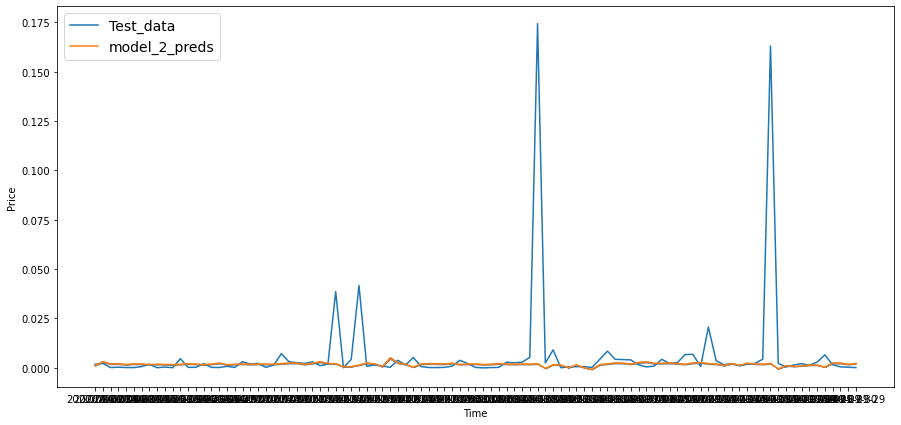

In [36]:
plt.figure(figsize=(15 , 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format="-", label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, format="-", label="model_2_preds")
plt.fill_between(x = X_test[-len(test_windows):] , y1 = upper , y2 = lower , color='grey')

In [37]:
# To create daily datetime
dti = pd.date_range("2019-04-01" , periods=365+366 , freq="D")
print(dti)

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10',
               ...
               '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-27', '2021-03-28', '2021-03-29',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', length=731, freq='D')


### Week wise Combine data

In [38]:
data['Date'] = pd.to_datetime(data['Date'])
try_1 = data.groupby([pd.Grouper(key='Date', freq='W-MON')])['DMBTR'].sum().reset_index().sort_values('Date')
try_1

,Date,DMBTR
0,2019-04-01,18862.76
1,2019-04-08,879671.89
2,2019-04-15,597410.91
3,2019-04-22,37065100.03
4,2019-04-29,1732535.02
...,...,...
92,2021-01-04,58387.15
93,2021-01-11,0.00
94,2021-01-18,0.00
95,2021-01-25,0.00


In [39]:
data['Date'] = pd.to_datetime(data['Date'])
try_2 = data.resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')
try_2

,Date,DMBTR
0,2019-04-01,18862.76
1,2019-04-08,879671.89
2,2019-04-15,597410.91
3,2019-04-22,37065100.03
4,2019-04-29,1732535.02
...,...,...
92,2021-01-04,58387.15
93,2021-01-11,0.00
94,2021-01-18,0.00
95,2021-01-25,0.00


In [40]:
import numpy as np
timesteps = try_2['Date'].to_numpy()
marketing = try_2["DMBTR"].to_numpy()
print(f'Median: {np.median(marketing)}\n , Mean: {np.mean(marketing)}\n , Minimum: {np.min(marketing)}\n , Maximum: {np.max(marketing)}')

timesteps[:10] , marketing[:10]

Median: 603639.3
 , Mean: 3508826.579793814
 , Minimum: -310433.18000000005
 , Maximum: 42439688.79999999


(array(['2019-04-01T00:00:00.000000000', '2019-04-08T00:00:00.000000000',
        '2019-04-15T00:00:00.000000000', '2019-04-22T00:00:00.000000000',
        '2019-04-29T00:00:00.000000000', '2019-05-06T00:00:00.000000000',
        '2019-05-13T00:00:00.000000000', '2019-05-20T00:00:00.000000000',
        '2019-05-27T00:00:00.000000000', '2019-06-03T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([1.88627600e+04, 8.79671890e+05, 5.97410910e+05, 3.70651000e+07,
        1.73253502e+06, 4.06135240e+05, 1.08412464e+06, 2.18898307e+07,
        3.75504360e+05, 5.36848190e+05]))

In [41]:
full_windows, full_labels = make_windows(marketing , window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(90, 90)

In [42]:
max_windows_val = tf.math.reduce_max(full_windows)
min_windows_val = tf.math.reduce_min(full_windows)
range_windows = max_windows_val - min_windows_val

max_labels_val = tf.math.reduce_max(full_labels)
min_labels_val = tf.math.reduce_min(full_labels)
range_labels = max_labels_val - min_labels_val

In [43]:
full_windows = full_windows / range_windows
full_labels = full_labels / range_labels
print(full_windows[:3])
print(full_labels[:3])

tf.Tensor(
[[4.41232893e-04 2.05770615e-02 1.39744843e-02 8.67017410e-01
  4.05270193e-02 9.50021242e-03 2.53595683e-02]
 [2.05770615e-02 1.39744843e-02 8.67017410e-01 4.05270193e-02
  9.50021242e-03 2.53595683e-02 5.12041363e-01]
 [1.39744843e-02 8.67017410e-01 4.05270193e-02 9.50021242e-03
  2.53595683e-02 5.12041363e-01 8.78370266e-03]], shape=(3, 7), dtype=float64)
tf.Tensor(
[[0.51204136]
 [0.0087837 ]
 [0.01255782]], shape=(3, 1), dtype=float64)


In [44]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(72, 18, 72, 18)

In [45]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.GRU(128, activation="linear")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(10 , activation = 'linear')(x)
output = layers.Dense(HORIZON)(x)
model_2 = tf.keras.Model(inputs=inputs, outputs=output, name="model_2_lstm")

# Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_2.fit(train_windows,
            train_labels,
            verbose = 0 , 
            epochs = 300,
            batch_size = 128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiment

In [46]:
# Load in best version of model 5 and evaluate on the test data
model_2 = tf.keras.models.load_model("model_experiments/model_2_lstm/")
model_2.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 237ms/step - loss: 0.0165


0.016512151807546616

In [47]:
# Make predictions with our LSTM model
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.00408206, 0.01040693, 0.00875302, 0.03883031, 0.03720383,
       0.00673123, 0.00711081, 0.00731588, 0.00366842, 0.01714409],
      dtype=float32)>

In [48]:
model_2_preds = tf.nn.relu(model_2_preds)

In [49]:
errors(y_true = tf.squeeze(test_labels) , y_pred = model_2_preds)

{'MAE: ': 0.016512152,
 'MSE': 0.00082649855,
 'RMSE': 0.028748889,
 'MAPE': 2742067.0,
 'Median': 0.009383599,
 '% error wrt median': 72.14859,
 '% error wrt mean': 72.14859}

In [50]:
upper , lower = upper_lower(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_2_preds)
# upper = upper * range_labels
# lower = lower * range_labels
# test_labels = test_labels * range_labels
# model_2_preds = model_2_preds * range_labels

In [51]:
split_size = int(0.8 * len(marketing))

X_train , y_train = timesteps[:split_size] , marketing[:split_size]

X_test , y_test = timesteps[split_size:] , marketing[split_size:]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(77, 20, 77, 20)

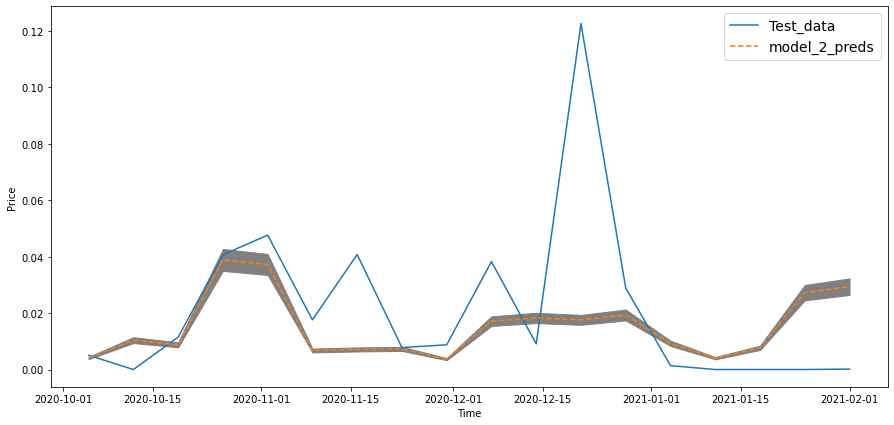

In [52]:
plt.figure(figsize=(15 , 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format="-", label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, format="--", label="model_2_preds")
plt.fill_between(x = X_test[-len(test_windows):] , y1 = upper , y2 = lower , color='grey')

## Sales / Marketing

In [53]:
sales_data = pd.read_csv('E:/Combined VBRK.txt')

In [54]:
sales_data.head()

,MANDT,VBELN,FKART,FKTYP,VBTYP,WAERK,BELNR,GJAHR,BUKRS,NETWR,KUNAG,FKDAT,BELNR.1,KURRF,ERDAT
0,400,1266268.0,ZF2C,L,M,INR,,0.0,BWPL,93927.0,10000008.0,20160719.0,,1.0,20160719.0
1,400,1266270.0,ZF2C,L,M,INR,,0.0,BWPL,79938.0,10000008.0,20160719.0,,1.0,20160719.0
2,400,1270953.0,ZF2C,L,M,INR,,0.0,BWPL,118851.0,10000008.0,20160927.0,,1.0,20160927.0
3,400,1271403.0,ZF2C,L,M,INR,,0.0,BWPL,114889.0,10000008.0,20161004.0,,1.0,20161004.0
4,400,1272693.0,ZF2C,L,M,INR,,0.0,BWPL,39617.0,10000008.0,20161025.0,,1.0,20161025.0


In [55]:
sales_data.dropna(inplace = True)

In [56]:
sales_data['FKDAT'] = sales_data['FKDAT'].apply(np.int64)
sales_data['Date'] = pd.to_datetime(sales_data['FKDAT'], format='%Y%m%d')
sales_data['Date'] = sales_data['Date'].apply(lambda x: str(x)[:-9])  
sales_data = sales_data.groupby('Date')['NETWR'].sum().reset_index()
sales_data.head()

,Date,NETWR
0,2016-04-01,34280332.36
1,2016-04-02,37270475.61
2,2016-04-03,29694567.13
3,2016-04-04,37835654.11
4,2016-04-05,37782891.50


In [57]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
try_3 = sales_data.groupby([pd.Grouper(key='Date', freq='W-MON')])['NETWR'].sum().reset_index().sort_values('Date')
try_3

,Date,NETWR
0,2016-04-04,1.390810e+08
1,2016-04-11,2.760109e+08
2,2016-04-18,2.899186e+08
3,2016-04-25,2.731540e+08
4,2016-05-02,2.785234e+08
...,...,...
248,2021-01-04,0.000000e+00
249,2021-01-11,0.000000e+00
250,2021-01-18,8.903583e+04
251,2021-01-25,7.004100e+02


In [58]:
result = pd.merge(try_3 , try_2 , on="Date")
result

,Date,NETWR,DMBTR
0,2019-04-01,4.211978e+08,18862.76
1,2019-04-08,3.925386e+08,879671.89
2,2019-04-15,4.139397e+08,597410.91
3,2019-04-22,3.966516e+08,37065100.03
4,2019-04-29,3.859043e+08,1732535.02
...,...,...,...
92,2021-01-04,0.000000e+00,58387.15
93,2021-01-11,0.000000e+00,0.00
94,2021-01-18,8.903583e+04,0.00
95,2021-01-25,7.004100e+02,0.00


In [62]:
result.insert(3 , 'Ratio(D/N)' , np.zeros(len(result) , dtype = int))

for i in range(len(result)):
    if(result.loc[i , 'NETWR'] == 0):
        result.loc[i , 'Ratio(D/N)'] = 0
        
    elif(result.loc[i , 'DMBTR'] == 0):
        result.loc[i , 'Ratio(D/N)'] = 0
        
    else:
        result.loc[i , 'Ratio(D/N)'] = result.loc[i , 'DMBTR'] / result.loc[i , 'NETWR']
        
result.head()        

,Date,NETWR,DMBTR,Ratio(D/N),Ratio(N/D)
0,2019-04-01,4.211978e+08,18862.76,0.000045,0.000045
1,2019-04-08,3.925386e+08,879671.89,0.002241,0.002241
2,2019-04-15,4.139397e+08,597410.91,0.001443,0.001443
3,2019-04-22,3.966516e+08,37065100.03,0.093445,0.093445
4,2019-04-29,3.859043e+08,1732535.02,0.004490,0.004490


In [63]:
import numpy as np
timesteps = result['Date'].to_numpy()
ratio = result["Ratio(D/N)"].to_numpy()
print(f'Median: {np.median(marketing)}\n , Mean: {np.mean(marketing)}\n , Minimum: {np.min(marketing)}\n , Maximum: {np.max(marketing)}')

timesteps[:10] , ratio[:10]

Median: 603639.3
 , Mean: 3508826.579793814
 , Minimum: -310433.18000000005
 , Maximum: 42439688.79999999


(array(['2019-04-01T00:00:00.000000000', '2019-04-08T00:00:00.000000000',
        '2019-04-15T00:00:00.000000000', '2019-04-22T00:00:00.000000000',
        '2019-04-29T00:00:00.000000000', '2019-05-06T00:00:00.000000000',
        '2019-05-13T00:00:00.000000000', '2019-05-20T00:00:00.000000000',
        '2019-05-27T00:00:00.000000000', '2019-06-03T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([4.47836158e-05, 2.24098167e-03, 1.44323165e-03, 9.34449851e-02,
        4.48954626e-03, 9.91214266e-04, 2.51583677e-03, 5.39855758e-02,
        8.39569040e-04, 1.18024653e-03]))

In [64]:
full_windows, full_labels = make_windows(ratio , window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(90, 90)

In [65]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(72, 18, 72, 18)

In [66]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.GRU(128, activation="linear")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(10 , activation = 'linear')(x)
output = layers.Dense(HORIZON)(x)
model_2 = tf.keras.Model(inputs=inputs, outputs=output, name="model_2_lstm")

# Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_2.fit(train_windows,
            train_labels,
            verbose = 0 , 
            epochs = 300,
            batch_size = 128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiment

In [67]:
# Load in best version of model 5 and evaluate on the test data
model_2 = tf.keras.models.load_model("model_experiments/model_2_lstm/")
model_2.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 122ms/step - loss: 0.0031


0.003050986910238862

In [78]:
# Make predictions with our LSTM model
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([5.1329611e-04, 9.2523172e-05, 5.9772981e-04, 3.0912231e-03,
       7.7704038e-04, 1.2932690e-03, 1.5913625e-04, 3.1388388e-04,
       5.1789195e-04, 8.0764620e-04], dtype=float32)>

In [79]:
errors(y_true = tf.squeeze(test_labels) , y_pred = model_2_preds)

{'MAE: ': 0.003050987,
 'MSE': 7.3313924e-05,
 'RMSE': 0.008562355,
 'MAPE': 196929.1,
 'Median': 0.0005757306,
 '% error wrt median': 43.386844635009766,
 '% error wrt mean': 41.63366358478864}

In [80]:
upper , lower = upper_lower(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_2_preds)

In [81]:
split_size = int(0.8 * len(marketing))

X_train , y_train = timesteps[:split_size] , marketing[:split_size]

X_test , y_test = timesteps[split_size:] , marketing[split_size:]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(77, 20, 77, 20)

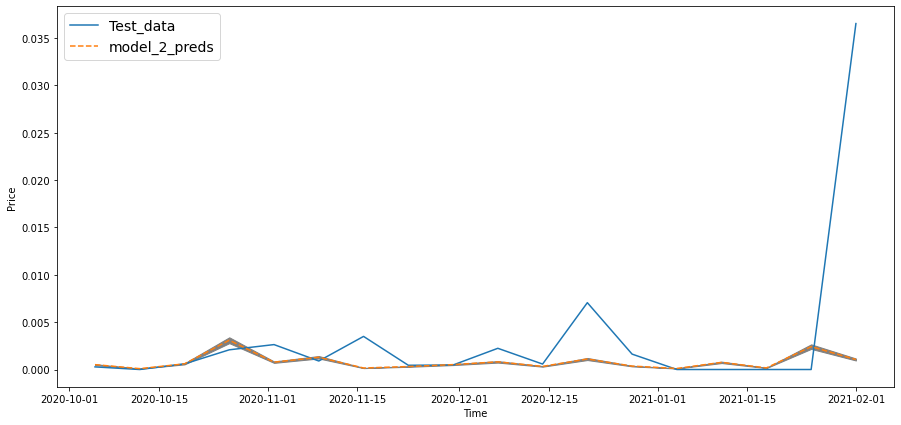

In [82]:
plt.figure(figsize=(15 , 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format="-", label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, format="--", label="model_2_preds")
plt.fill_between(x = X_test[-len(test_windows):] , y1 = upper , y2 = lower , color='grey')

Model prediction are not accurate. Reason can be model is unable to deal with value = 0 in dataset